In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
tf.random.set_seed(42)

df_heart = pd.read_csv("heart.csv")

2025-06-16 11:21:54.131396: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-16 11:21:54.403051: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750053114.525230   18365 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750053114.558891   18365 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750053114.778257   18365 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
X = df_heart.drop('HeartDisease', axis=1)
y = df_heart['HeartDisease']

categorical = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

print("\n📊 Training model...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
print("✅ Training complete.")

I0000 00:00:1750053120.868898   18365 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2155 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6



📊 Training model...


I0000 00:00:1750053122.869695   18465 service.cc:152] XLA service 0x7788980044d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750053122.869754   18465 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-06-16 11:22:03.028664: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750053123.369465   18465 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1750053125.516582   18465 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


✅ Training complete.


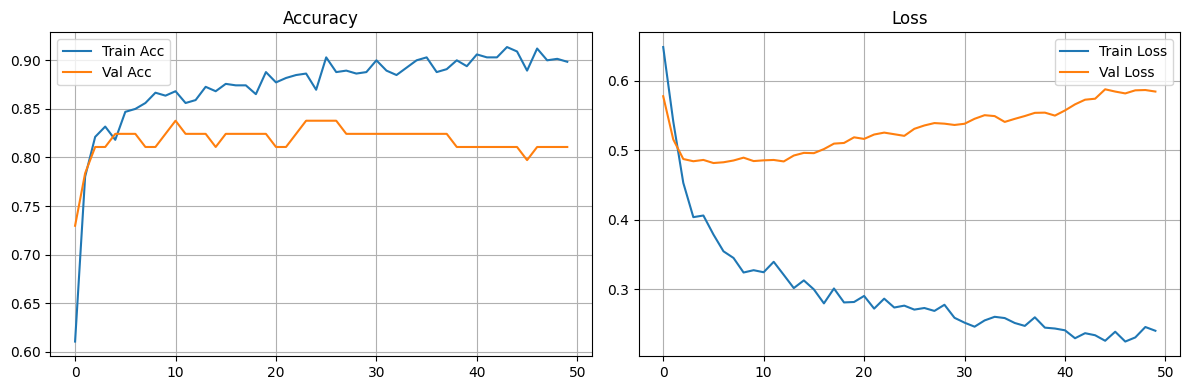

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy'); plt.legend(); plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss'); plt.legend(); plt.grid()
plt.tight_layout()
plt.show()


🧪 Test Accuracy: 0.8804 | Precision: 0.8774 | Recall: 0.9118

Classification Report:
                precision    recall  f1-score   support

        No HF       0.88      0.84      0.86        82
Heart Failure       0.88      0.91      0.89       102

     accuracy                           0.88       184
    macro avg       0.88      0.88      0.88       184
 weighted avg       0.88      0.88      0.88       184



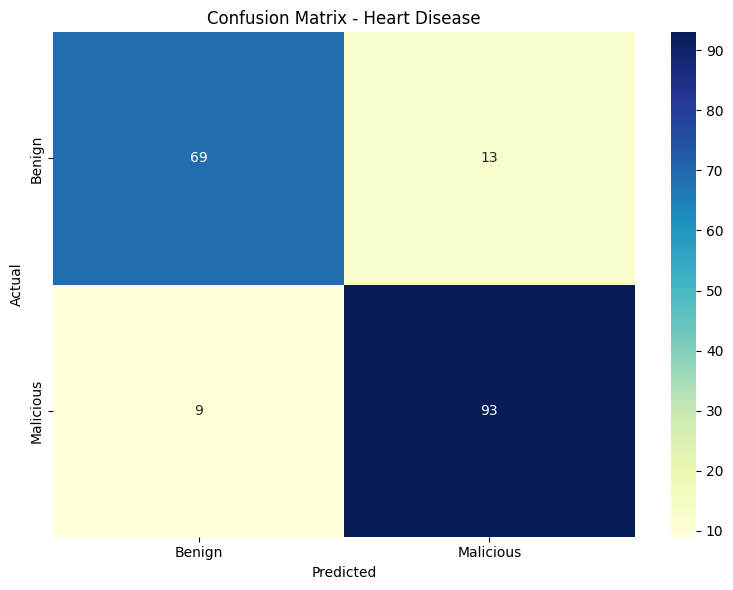

In [7]:
loss, acc, prec, rec = model.evaluate(X_test, y_test, verbose=0)
y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

print(f"\n🧪 Test Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No HF', 'Heart Failure']))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.title("Confusion Matrix - Heart Disease")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()